In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("flightData_0_deg.csv")

Alt = data["Altitude"]
Acc_Z = data["AccX"]
Time = data["Time"].div(1000)

# import raw data to calculate sensor covariance from
raw_data = pd.read_csv("flightData_0_deg_raw.csv")
cov_mat = raw_data.iloc[200:1200][["Altitude", "AccX"]].cov()
print(cov_mat)

          Altitude      AccX
Altitude  0.092852 -0.055174
AccX     -0.055174  0.460889


In [6]:
def diff(X, T):
    V = []
    for i in range(1, len(X)):
        V.append((X[i]-X[i-1])/(T[i]-T[i-1]))
    return V

def integrate(X, T):
    V = [0]
    for i in range(1, len(X)):
        V.append(V[-1] + 0.5*(T[i]-T[i-1])*(X[i-1] + X[i]))
    return V

V_Baro = diff(Alt.tolist(), Time.tolist())
V_Acc = integrate(Acc_Z.tolist(), Time.tolist())


In [7]:
# Kalman Filter
def getF(delta_T):
    return np.array([[1, delta_T, 0.5*delta_T**2], [0, 1, delta_T], [0, 0, 1]])

Alt_pred = []
Vel_pred = []
Acc_pred = []

C = np.array([[1, 0, 0], [0, 0, 1]])
# State Vector
Xk = np.array([[0], [0], [0]])
# State Estimate Covariance
Pk = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
# Sensor Covariance
R = np.array([[0.0929, 0], [0, 0.4609]])
# Model Covariance
Q = np.array([[0.0000001, 0, 0], [0, 0, 0], [0, 0, 0.1]])
for i in range(1, len(Time)):
    delta_T = Time[i] - Time[i-1]
    Y = np.array([[Alt[i]], [Acc_Z[i]]])
    F = getF(delta_T)
    Xkp_min = F.dot(Xk)
    Ykp_min = C.dot(Xkp_min)
    Pkp_min = F.dot(Pk).dot(np.transpose(F)) + Q
    K = Pkp_min.dot(np.transpose(C)).dot(np.linalg.inv(C.dot(Pkp_min).dot(np.transpose(C)) + R))
    Xk = Xkp_min + K.dot(Y - Ykp_min)
    Pk = (np.eye(3) - K.dot(C)).dot(Pkp_min)

    Alt_pred.append(Xk[0][0])
    Vel_pred.append(Xk[1][0])
    Acc_pred.append(Xk[2][0])



[0.0, -0.0007753741480985582, -0.002186357088677985, -0.0034305570443563444, -0.003763745334721653, -0.0024639088192908287, 0.0014662360520225435, 0.008114484886948508, 0.017747750911083108, 0.03205546338863066, 0.05048412202614248, 0.07351941676869284, 0.1016500369487783, 0.1351718740006997, 0.17413376256234037, 0.21973530874757183, 0.272639416958085, 0.33315830789808065, 0.39866318311869686, 0.47359589793574886, 0.5532742963519687, 0.6377906057070016, 0.7235794815634726, 0.8095448354449376, 0.8977234025473474, 0.9869354124046313, 1.0737240691699501, 1.1580385442055328, 1.2409124931538387, 1.3179449457062322, 1.3844101496949865, 1.4433489466181468, 1.4987695186760763, 1.5486511451207603, 1.5942529454674526, 1.6266105866598628, 1.6523261231428628, 1.675189060749652, 1.6886903670346887, 1.6929533872374722, 1.6903929138974407, 1.6855285673153793, 1.6761712397572917, 1.6576369097948191, 1.6703770490166594, 1.9572307880909685, 2.6756505128980623, 3.5314465803684505, 4.482081995890179, 5.46

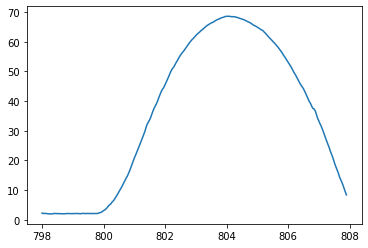

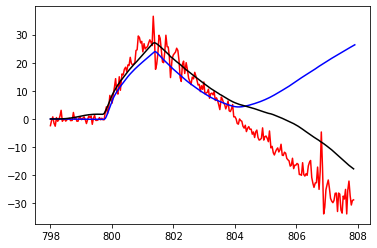

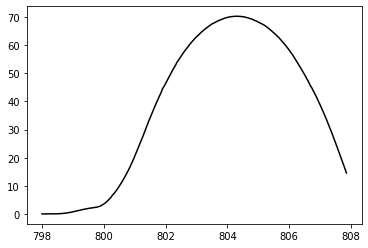

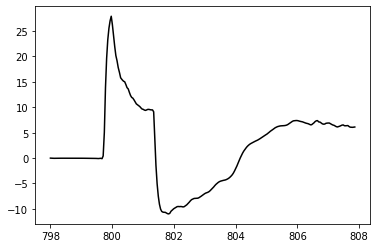

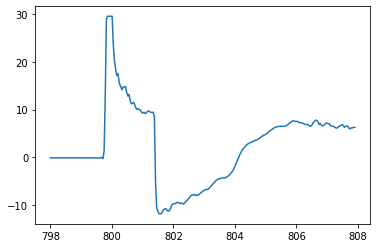

In [8]:
plt.plot(Time, Alt)
plt.show()
plt.plot(Time[:-1], V_Baro, 'r')
plt.plot(Time, V_Acc, 'b')
plt.plot(Time[:-1], Vel_pred, 'k')
plt.show()
plt.plot(Time[:-1], Alt_pred, 'k')
plt.show()
plt.plot(Time[:-1], Acc_pred, 'k')
plt.show()
plt.plot(Time, Acc_Z)
plt.show()